# TensorFlow 入门

  到目前为止，我们一直在使用numpy来自己编写神经网络。现在我们将一步步的使用深度学习的框架来很容易的构建属于自己的神经网络。我们将学习TensorFlow这个框架：


* 初始化变量
* 建立一个会话
* 训练的算法
* 实现一个神经网络


使用框架编程不仅可以节省你的写代码时间，还可以让你的优化速度更快。



# 1 - 导入TensorFlow库

开始之前，我们先导入一些库

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

#%matplotlib inline #如果你使用的是jupyter notebook取消注释
np.random.seed(1)

ImportError: DLL load failed: 找不到指定的程序。

我们现在已经导入了相关的库，我们将引导你完成不同的应用，我们现在看一下下面的计算损失的公式： 

$$loss=L(\hat y,y)=(\hat y^{(i)}-y^{(i)})^2$$

In [2]:
y_hat = tf.constant(36,name="y_hat")            #定义y_hat为固定值36
y = tf.constant(39,name="y")                    #定义y为固定值39

loss = tf.Variable((y-y_hat)**2,name="loss" )   #为损失函数创建一个变量

init = tf.global_variables_initializer()        #运行之后的初始化(ession.run(init))
                                                #损失变量将被初始化并准备计算
with tf.Session() as session:                   #创建一个session并打印输出
    session.run(init)                           #初始化变量
    print(session.run(loss))                    #打印损失值

9


对于Tensorflow的代码实现而言，实现代码的结构如下：


1. 创建Tensorflow变量（此时，尚未直接计算）
2. 实现Tensorflow变量之间的操作定义
3. 初始化Tensorflow变量
4. 创建Session
5. 运行Session，此时，之前编写操作都会在这一步运行。


  因此，当我们为损失函数创建一个变量时，我们简单地将损失定义为其他数量的函数，但没有评估它的价值。 为了评估它，我们需要运行init=tf.global_variables_initializer()，初始化损失变量，在最后一行，我们最后能够评估损失的值并打印它的值。

现在让我们看一个简单的例子：

In [16]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


正如预料中一样，我们并没有看到结果20，不过我们得到了一个Tensor类型的变量，没有维度，数字类型为int32。我们之前所做的一切都只是把这些东西放到了一个“计算图(computation graph)”中，而我们还没有开始运行这个计算图，为了实际计算这两个数字，我们需要创建一个会话并运行它：

In [17]:
sess = tf.Session()

print(sess.run(c))

20


总结一下，记得初始化变量，然后创建一个session来运行它。 

  接下来，我们需要了解一下占位符（placeholders）。占位符是一个对象，它的值只能在稍后指定，要指定占位符的值，可以使用一个feed字典（feed_dict变量）来传入，接下来，我们为x创建一个占位符，这将允许我们在稍后运行会话时传入一个数字。

In [18]:
#利用feed_dict来改变x的值

x = tf.placeholder(tf.int64,name="x")
print(sess.run(2 * x,feed_dict={x:3}))
sess.close()

6


# 1.1 - 线性函数

　　让我们通过以下等式来开始编程：$Y=WX+b,$$W$和$X$是随机矩阵，$b$是随机向量。
    我们计算$WX+b$,其中$W$,$X$,$b$是从随机正太分布中抽取的。$W$的维度是（4,3），$X$是（3,1），$b$是（4,1）。我们开始定义一个shape=（3,1）的常量$X$:
    
    X = tf.constant(np.random.randn(3,1), name = "X")

In [19]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回：
        result - 运行了session后的结果，运行的是Y = WX + b 

    """

    np.random.seed(1) #指定随机种子

    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)

    Y = tf.add(tf.matmul(W,X),b) #tf.matmul是矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以以写成这样子

    #创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)

    #session使用完毕，关闭它
    sess.close()

    return result

我们来测试一下：

In [20]:
print("result = " +  str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


# 1.2-计算sigmoid

　　我们已经实现了线性函数，Tensorflow提供了多种常用的神经网络函数比如tf.softmax和tf.sigoid
  　我们将使用占位符变量x，运行这个session的手，我们使用feed字典来输入z,然后创建占位符变量x，使用ft.sigmoid来定义操作符，最后运行session，我们会用到下面的代码：
   
   * tf.placeholder(tf.float32,name="...")
   
   * tf.sigmoid()
   
   * sess.run(...feed_dict={x:z})
  
 需要注意的是我们可以使用两种方法创建并使用session
 
 #### 方法一：
 
sess = tf.Session()

result = sess.run(...,feed_dict = {...})

sess.close()

 #### 方法二：
 
 with tf.Session as sess:
    result = sess.run(...,feed_dict = {...})
    
我们来实现它：

In [21]:
def sigmoid(z):
    """
    实现使用sigmoid函数计算z
    
    参数：
        z - 输入的值，标量或矢量
        
    返回：
        result - 用sigmoid计算z的值
        
    """
    
    #创建一个占位符x,名字叫“x”
    x = tf.placeholder(tf.float32,name="x")
    
    #计算sigmoid(z)
    sigmoid = tf.sigmoid(x)
    
    #创建一个会话，使用方法一
    sess = tf.Session()
    result = sess.run(sigmoid,feed_dict={x:z})
    sess.close()
    """
    #创建一个会话，使用方法二
    with tf.Session() as sess:
        result = sess.run(sigmoid,feed_dict={x:z})
    """  
    
    return result

现在我们测试一下：

In [22]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


# 1.3-计算成本

还可以使用内置函数计算神经网络的成本。因此，不需要编写代码来计算成本函数的$a^{[2](i)}$和$y^{(i)}$ for i= 1...m:

$$J=-\frac{1}{m}\sum_{i=1}^m(y^{(i)}loga^{[2](i)}+(1-y^{(i)})log(1-a^{[2](i)}))$$

实现成本函数，需要用到的是：

tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,labels = ...)

　　你的代码应该输入z，计算sigmoid（得到a）,然后计算交叉熵成本J，所有的步骤都可以通过一次调用tf.nn.sigmoid_cross_entropy_with_logits来完成。
  
 # 1.4-使用独热编码（0、1编码）
 
 　　很多时候在深度学习中y向量的维度是从0到C-1的，C是指分类的类别数量，如果C=4，那么对y而言你可能需要有一下的转换方式：
   ![20180417110137252.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/7-%E7%BC%96%E7%A0%81.png?raw=true)
   
   这叫做独热编码（“noe hot ”encoding）,因为在转换后的表示中，每列的一个元素是"hot"（意思是设置为1）。要自爱numpy中进行这种转换，你可能需要编写几行代码。在tensorflow中，只需要使用一行代码：
   
   tf.one_hot(indices,depth,axis)
   
   下面我们要做的是取一个标签矢量和C类总数，返回一个独热编码。

In [23]:
def one_hot_matrix(lables,C):
    """
    创建一个矩阵，其中第i行对应第i个类号，第j列对应第j个训练样本，所以如果第j个样本对应着第i个标签，那么entry(i,j)将会是1
    
    参数：
        lables - 标签向量
        C - 分类数
        
    返回：
        one_hot - 独热矩阵
    """
    
    #创建一个tf.constant,赋值为C,名字叫做C
    c = tf.constant(C,name="C")
    
    #使用tf.one_hot,注意一下axis
    one_hot_matrix = tf.one_hot(indices=lables,depth=C,axis=0)
    
    #创建一个session
    sess = tf.Session()
    
    #运行session
    one_hot = sess.run(one_hot_matrix)
    
    #关闭session
    sess.close()
    
    return one_hot

我们来测试一下：


In [24]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


# 1.5-初始化0和1

　　现在我们将学习如何用0或者1初始化一个向量，我们要用到tf.ones()和tf.zeros()，给定这些函数一个维度值那么它们将会返回全是1或者0的满足条件的向量/矩阵，我们来看看怎样实现它们：

In [25]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值权威1
    
    参数：
        shape - 你要创建的数组的维度
    
    返回：
        ones - 只包含1的数组
    """
    
    #使用tf.ones()
    ones = tf.ones(shape)
    
    #创建会话
    sess = tf.Session()
    
    #运行会话
    ones = sess.run(ones)
    
    #关闭会话
    sess.close()
    
    return ones

测试一下：

In [26]:
print("ones = "+str(ones([3])))

ones = [1. 1. 1.]


# 2 - 使用TensorFlow构建一个神经网络

　　我们将会使用TensorFlow构建一个神经网络，需要记住的是实现模型需要做一下两个步骤：
  
  
 　 1. 创建计算图
  
   2. 运行计算图
 

　我们开始步地走一下：

## 2.1 - 要解决的问题

   一天下午，我们和一些朋友决定教我们的电脑破译手语。我们花了几个小时在白色的墙壁前拍照，于是就有了以下数据集，现在，你的任务是建立一个算法，使有语言障碍的人与不懂手语的人交流
   
   * 训练集：有从0到5的数字的1080张图片（64X64像素），每个数字拥有180张图片。
   
   * 测试集：有从0到5的数字的120张图片（64X64像素），每个数字拥有5图片。
   
   需要注意的是这是完整数据集的一个子集，完整的数据集包含更多的符号。
   
   下面是每个数字的样本，以及我们如何表示标签的结束。这些都是原始图片，我们实际上用的是（64X64像素）的图片
   ![20180417110431384.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/7-%E9%97%AE%E9%A2%981.png?raw=true)
   　　　　　　　　　　　　　　　　　　　　　　　　　　　　图1：手势符号数据集
                               
                               
   首先我们需要加载数据集：

In [4]:
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = tf_utils.load_dataset()

我们可以看一下数据集里面有什么，当然你也可以自己更改一下index的值。

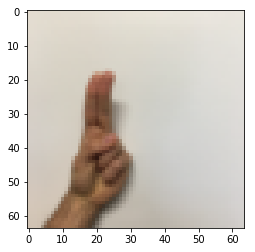

Y = 2


In [6]:
index = 10
plt.imshow(X_train_orig[index])
plt.show()
print("Y = " + str(np.squeeze(Y_train_orig[:,index])))

和往常一样，我们要对数据进行扁平化，然后再除以255以会归一化数据，除此之外，我们需要把每个标签转化为独热向量，像上面的图一样。

In [29]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T #每一列就是一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T
#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

#转换为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))


训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


我们的目标是构建能够高准确识别符号的算法。要做到这一点，你要建立一个TensorFlow模型，这个模型几乎和你之前在猫识别中使用的numpy一样（但现在使用softmax）。要将你的numoy实现与tensoflow实现进行比较的话，这是一个很好的机会。

　　目前的模型是：LINEAR->RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX,SIGMOID输出层已经转换为SOFTMAX。当有两个以上的类时，一个SOFTMAX层将SIGMOID一般化
  
  # 2.1 - 创建placeholders
  
  我们的第一项任务是为X和Y创建占位符，这将允许我们稍后再运行会话时传递你的训练数据。

In [30]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小（64*64*3 = 12288）
        
        n_y - 一个实数，分类数（从0到5，所以n_y = 6）
    
    返回：
        x - 一个数据输入的占位符，维度为【n_x,None】,dtype = "float"
        y - 一个对应输入的标签的占位符，维度为【n_Y,None】,dtype = "float"
    
    提示：
        使用None，因为它可以让我们灵活处理占位符提供的样本数量，事实上，测试/训练期间的样本是不同的。
        
        
    """
    
    X = tf.placeholder(tf.float32,[n_x,None],name="X")
    Y = tf.placeholder(tf.float32,[n_y,None],name="Y")
    
    return X,Y

测试一下：

In [31]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_3:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


# 2.2 - 初始化参数

初始化tensorflow中的参数，我们将使用Xavier初始化权重和用零来初始化偏差，比如：

W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))

b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())

因为tf.Variable()每次都在创建新对象，对于get_variable()来说，对于已经创建的变量对象，就把那个对象返回，如果没有创建变量对象的话，就创建一个新的

In [32]:
def initialize_parameters():
    """
    
    初始化神经网络的参数，参数维度如下：
    
    W1 : [25,12288]
    
    b1 : [25,1]
    
    W2 : [12,25]
    
    b2 : [12.1]
    
    W3 : [6,12]
    
    b3 : [6,1]
    
    返回：
        parameters - 包含了w和b的字典
        
    """
    tf.set_random_seed(1) #指定随机种子

    W1 = tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

测试一下：

In [33]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = "+str(parameters["W1"]))
    print("b1 = "+str(parameters["b1"]))
    print("W2 = "+str(parameters["W2"]))
    print("b2 = "+str(parameters["b2"]))
 

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


正如预测的那样，这些参数只有物理空间，但是还没有被赋值，这是因为没有通过session执行。

# 2.3 - 前向传播

我们将要再TensorFlow中实现前向传播，该函数将接受一个字典参数并完成前向传播，它会用到以下代码：

* tf.add(...):加法

* tf.matmu(...,...) : 矩阵乘法

* tf.nn.relu(...) : Relu激活函数

我们要实现神经网络的前向传播，我们会拿numpy与TensorFlow实现的神经网络的代码做比较，最重要的是前向传播要在$Z_3$处停止，因为在TensorFlow中最后的线性输出层的输出作为计算损失函数的输入，所以不需要$A_3$。

In [34]:
def forward_propagation(X,parameters):
    """
    实现一个模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    参数：
        X - 输入数据的占位符，维度为（输入节点数量，样本数量）
        parameters - 包含了W和b的参数的字典
        
    返回：
        Z3 - 最后一个LINEAR节点的输出
        
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = tf.add(tf.matmul(W1,X),b1)          # Z1 = np.dot(W1,X) + b1
    #Z1 = tf.matmul(W1,X)+b1   也可以这样写
    A1 = tf.nn.relu(Z1)                     # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)       # Z2 = np.dot(W2.A1) + b2
    A2 = tf.nn.relu(Z2)                   # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)     # Z3 = np.dot(W3,Z2) + b2
    
    return Z3

测试一下：

In [35]:
tf.reset_default_graph() #用于清楚默认图形堆栈并重置全局默认图形。
with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print("Z3 =" + str(Z3))

Z3 =Tensor("Add_2:0", shape=(6, ?), dtype=float32)


你可能已经注意到前向传播不会输出任何cache，当我们完成反向传播的时候你就会明白了。

# 2.4 - 计算成本

如前所述，成本很容易计算：

tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))

我们现在就来实现计算成本的函数：

In [36]:
def compute_cost(Z3,Y): 
    """
    计算成本
    
    参数：
        Z3 - 前向传播
        Y - 标签，一个占位符，和Z3的维度相同
    
    返回：
        cost - 成本值
    
    """
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

测试一下：

In [37]:
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


# 2.5 - 反向传播&更新参数

  得益于编程框架，所有反向传播和参数更新都在1行代码中处理，计算成本函数后，将创建一个“optimizer”对象。运行tf.session时，必须将此对象与成本函数一起调用，当被调用时，它将使用所选择的方法和学习速率对给定成本进行优化。
  
  举个例子，对于梯度下降
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
  
  要进行优化，应该这样做：
  
  _ , c = sess.run([optimizer,cost],feed_dict={X:mini_batch_X,Y:mini_batch_Y})
  
  编写代码时，我们经常使用 _ 作为一次性变量来存储我们稍后不需要使用的值，这里，_ 具有我们不需要优化的优化器的评估值（并且c取值为成本变量的值）
  
 # 2.6 - 构建模型
 
 现在我们将实现我们的模型

In [38]:
def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
        print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init = tf.global_variables_initializer()

    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)

        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)

            for minibatch in minibatches:

                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch

                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")

        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters

我们来正式运行一下模型，请注意，这次的运行时间大约在5-8分钟左右，如果在epoch = 100的时候，你的epoch_cost  = 1.01645776539的值和我相差过大，那么你就立即停止，回头检查一下哪里出了问题。

epoch = 0    epoch_cost = 1.8557019269827641
epoch = 100    epoch_cost = 1.0164578647324536
epoch = 200    epoch_cost = 0.7331024182565287
epoch = 300    epoch_cost = 0.572938044865926
epoch = 400    epoch_cost = 0.46879878685329895
epoch = 500    epoch_cost = 0.3809791356325149
epoch = 600    epoch_cost = 0.31381883946332073
epoch = 700    epoch_cost = 0.2542582939971576
epoch = 800    epoch_cost = 0.20379492617917788
epoch = 900    epoch_cost = 0.16640976816415787
epoch = 1000    epoch_cost = 0.14149723292300195
epoch = 1100    epoch_cost = 0.10757850674968776
epoch = 1200    epoch_cost = 0.08622855230262785
epoch = 1300    epoch_cost = 0.05941533940759573
epoch = 1400    epoch_cost = 0.052237425846132376


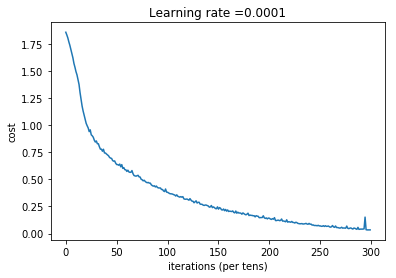

参数已经保存到session。
训练集的准确率： 0.9990741
测试集的准确率: 0.71666664
CPU的执行时间 = 386.9011280190664 秒


In [43]:
#开始时间
start_time = time.clock()
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.clock()
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )